In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,root_mean_squared_error
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df=pd.read_csv('C:\\Users\\T Ganesh\\OneDrive\\Desktop\\gsg\\housepridiction\\data\\data.csv')

: 

: 

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014 00:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 00:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014 00:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014 00:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-2014 00:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


: 

: 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

: 

: 

In [ ]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

: 

: 

In [ ]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

: 

: 

In [ ]:
df.drop(['date','street', 'city',
       'statezip', 'country'],axis=1,inplace=True)

: 

: 

In [ ]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


: 

: 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   int64  
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 467.3 KB


: 

: 

In [ ]:
x=df.drop('price',axis=1)
y=df['price']

: 

: 

In [ ]:
x

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979
4596,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009
4597,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0
4598,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0


: 

: 

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

: 

: 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_s=scaler.fit_transform(x_train)
x_test_s=scaler.transform(x_test)

: 

: 

In [ ]:
df.info()

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

: 

: 

In [ ]:
numerical_cols = x.select_dtypes(include=[np.number]).columns

: 

: 

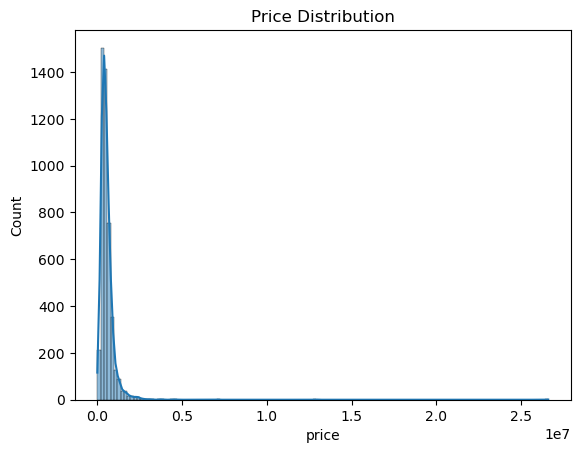

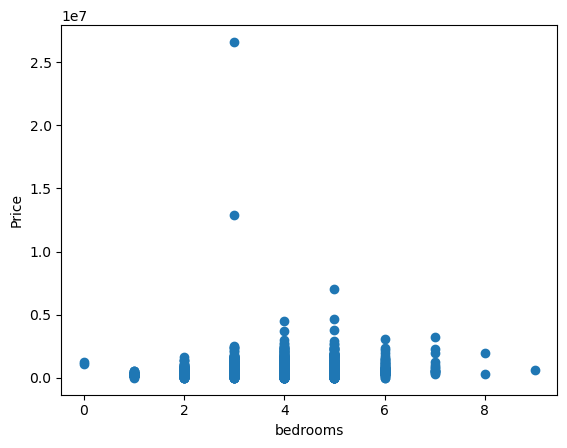

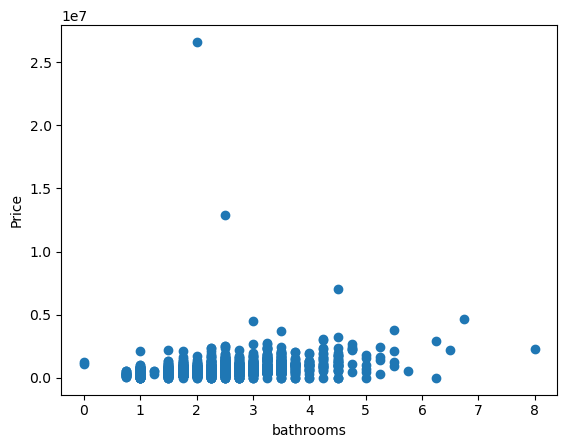

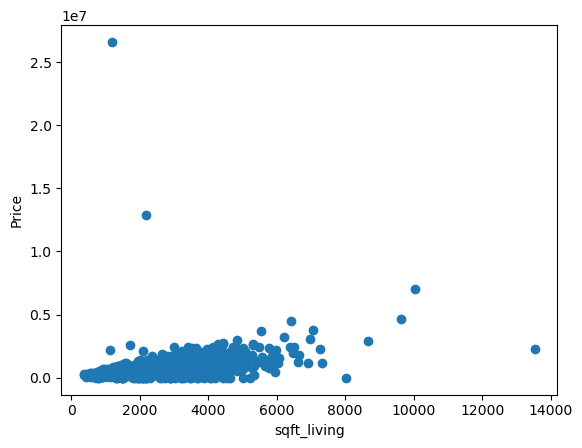

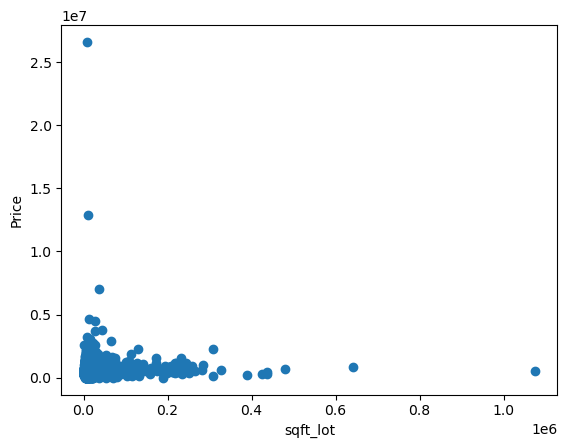

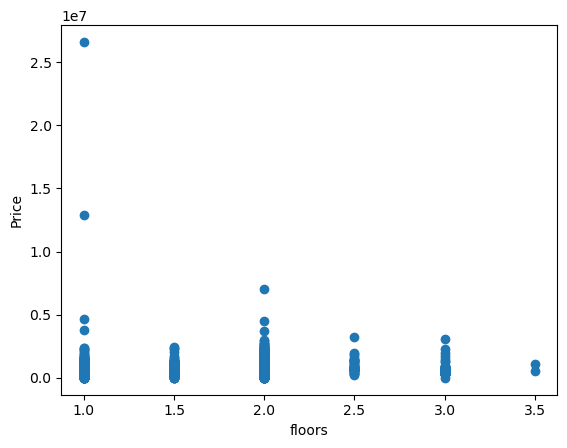

: 

: 

In [ ]:
# Distribution of target
sns.histplot(y, kde=True)
plt.title('Price Distribution')
plt.show()

# Scatter plots for key features vs price
for col in numerical_cols[:5]:  # First 5 numerical columns
    plt.scatter(x[col], y)
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()



In [ ]:
def evaluate_model(true,predicted):
    mse=mean_squared_error(true,predicted)
    mae=mean_absolute_error(true,predicted)
    score=r2_score(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    return mse,mae,score,rmse

: 

: 

In [ ]:
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'XGBRegressor': XGBRegressor(),
    'SVR': SVR(),
    'AdaBoostRegressor': AdaBoostRegressor(),
    'KNeighborsRegressor': KNeighborsRegressor()
}
models_list=[]
r2_list=[]
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train_s,y_train)
    y_pred=model.predict(x_test_s)
    mse_error,mae_error,score_error,rmse_error=evaluate_model(y_test,y_pred)
    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])
    print("mse :{:.4f}".format(mse_error))
    print("mae :{:.4f}".format(mae_error))
    print("rmse:{:.4f}".format(rmse_error))
    print("score :{:.4f}".format(score_error))
    r2_list.append(score_error)
    print('='*35)
    print('\n')

LinearRegression
mse :986921767056.1216
mae :210908.1732
rmse:993439.3625
score :0.0323


Ridge
mse :986909641561.5087
mae :210898.9673
rmse:993433.2597
score :0.0323


Lasso
mse :986922260288.0712
mae :210908.2955
rmse:993439.6108
score :0.0323


DecisionTreeRegressor
mse :1038403094691.3101
mae :260247.5879
rmse:1019020.6547
score :-0.0182


RandomForestRegressor
mse :991230143567.6368
mae :206210.1294
rmse:995605.4156
score :0.0281


GradientBoostingRegressor
mse :981292734845.2557
mae :202498.6644
rmse:990602.2082
score :0.0378


XGBRegressor
mse :990678888370.9458
mae :206328.0740
rmse:995328.5329
score :0.0286


SVR
mse :1033470820800.6158
mae :267327.9346
rmse:1016597.6691
score :-0.0134


AdaBoostRegressor
mse :1108116380931.2625
mae :459127.9964
rmse:1052671.0697
score :-0.0866


KNeighborsRegressor
mse :995701117504.5638
mae :214166.4925
rmse:997848.2437
score :0.0237




: 

: 

In [ ]:
import pandas as pd
results_df = pd.DataFrame({'Model': models_list, 'R2 Score': r2_list})
print(results_df.sort_values('R2 Score', ascending=False))

                       Model  R2 Score
5  GradientBoostingRegressor  0.037803
1                      Ridge  0.032296
0           LinearRegression  0.032284
2                      Lasso  0.032283
6               XGBRegressor  0.028600
4      RandomForestRegressor  0.028059
9        KNeighborsRegressor  0.023675
7                        SVR -0.013359
3      DecisionTreeRegressor -0.018196
8          AdaBoostRegressor -0.086552


: 

: 

In [ ]:
# STEP 1: Reload Data with All Features (Don't Drop Important Columns)

: 

: 

In [ ]:
# Reload data fresh
df_new = pd.read_csv('C:\\Users\\T Ganesh\\OneDrive\\Desktop\\gsg\\housepridiction\\data\\data.csv')

# Extract useful features from DATE instead of dropping it
# Fix: Specify the correct date format (DD-MM-YYYY)
df_new['date'] = pd.to_datetime(df_new['date'], format='%d-%m-%Y %H:%M')
df_new['year'] = df_new['date'].dt.year
df_new['month'] = df_new['date'].dt.month

# Drop only unnecessary columns (keep location info)
df_new = df_new.drop(['date', 'street'], axis=1)

# Encode categorical columns: city, statezip, country
from sklearn.preprocessing import LabelEncoder
le_city = LabelEncoder()
le_state = LabelEncoder()
le_country = LabelEncoder()

df_new['city_encoded'] = le_city.fit_transform(df_new['city'])
df_new['statezip_encoded'] = le_state.fit_transform(df_new['statezip'])
df_new['country_encoded'] = le_country.fit_transform(df_new['country'])

# Drop original categorical columns
df_new = df_new.drop(['city', 'statezip', 'country'], axis=1)

print("New dataset shape:", df_new.shape)
print("\nNew columns:")
print(df_new.columns.tolist())
print("\nFirst few rows:")
print(df_new.head())

New dataset shape: (4600, 18)

New columns:
['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'year', 'month', 'city_encoded', 'statezip_encoded', 'country_encoded']

First few rows:
       price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0   313000.0         3       1.50         1340      7912     1.5           0   
1  2384000.0         5       2.50         3650      9050     2.0           0   
2   342000.0         3       2.00         1930     11947     1.0           0   
3   420000.0         3       2.25         2000      8030     1.0           0   
4   550000.0         4       2.50         1940     10500     1.0           0   

   view  condition  sqft_above  sqft_basement  yr_built  yr_renovated  year  \
0     0          3        1340              0      1955          2005  2014   
1     4          5        3370            280      1921       

: 

: 

In [ ]:
# STEP 2: Check Feature Correlations

: 

: 

In [ ]:
# Check correlations with price
correlation = df_new.corr()['price'].sort_values(ascending=False)
print("Feature Correlations with Price:")
print(correlation)
print("\n" + "="*50)
print("Top 5 most correlated features:")
print(correlation.head(6))  # First is price itself, so show top 6


Feature Correlations with Price:
price               1.000000
sqft_living         0.430410
sqft_above          0.367570
bathrooms           0.327110
view                0.228504
sqft_basement       0.210427
bedrooms            0.200336
floors              0.151461
waterfront          0.135648
sqft_lot            0.050451
month               0.041081
condition           0.034915
yr_built            0.021857
city_encoded        0.018625
yr_renovated       -0.028774
statezip_encoded   -0.043385
year                     NaN
country_encoded          NaN
Name: price, dtype: float64

Top 5 most correlated features:
price            1.000000
sqft_living      0.430410
sqft_above       0.367570
bathrooms        0.327110
view             0.228504
sqft_basement    0.210427
Name: price, dtype: float64


: 

: 

In [ ]:
# STEP 3: Train Models with Improved Data

: 

: 

In [ ]:
# Prepare data with new features
x_new = df_new.drop('price', axis=1)
y_new = df_new['price']

# Split data
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(
    x_new, y_new, test_size=0.2, random_state=42
)

# Scale data
scaler_new = StandardScaler()
x_train_new_s = scaler_new.fit_transform(x_train_new)
x_test_new_s = scaler_new.transform(x_test_new)

print("Training set shape:", x_train_new_s.shape)
print("Test set shape:", x_test_new_s.shape)
print("\nTraining improved models...")
print("="*50)

# Train models with new data
models_improved = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'XGBRegressor': XGBRegressor(),
}

models_list_new = []
r2_list_new = []

for name, model in models_improved.items():
    model.fit(x_train_new_s, y_train_new)
    y_pred_new = model.predict(x_test_new_s)
    
    mse = mean_squared_error(y_test_new, y_pred_new)
    mae = mean_absolute_error(y_test_new, y_pred_new)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_new, y_pred_new)
    
    print(name)
    print("MSE  :{:.4f}".format(mse))
    print("MAE  :{:.4f}".format(mae))
    print("RMSE :{:.4f}".format(rmse))
    print("R²   :{:.6f}".format(r2))
    print('='*50)
    
    models_list_new.append(name)
    r2_list_new.append(r2)

# Results table
results_improved = pd.DataFrame({
    'Model': models_list_new, 
    'R2 Score': r2_list_new
})
print("\nFinal Results (Best to Worst):")
print(results_improved.sort_values('R2 Score', ascending=False))


Training set shape: (3680, 17)
Test set shape: (920, 17)

Training improved models...
LinearRegression
MSE  :985499432077.2172
MAE  :207692.7597
RMSE :992723.2404
R²   :0.033679
Ridge
MSE  :985487449245.2118
MAE  :207682.2152
RMSE :992717.2051
R²   :0.033690
Lasso
MSE  :985500069304.3961
MAE  :207693.0044
RMSE :992723.5614
R²   :0.033678
DecisionTreeRegressor
MSE  :1026058035772.1678
MAE  :212433.2128
RMSE :1012945.2284
R²   :-0.006091
RandomForestRegressor
MSE  :976038935237.8148
MAE  :165767.5184
RMSE :987946.8281
R²   :0.042955
GradientBoostingRegressor
MSE  :965998822368.4926
MAE  :169152.6537
RMSE :982852.3909
R²   :0.052800
XGBRegressor
MSE  :962345063514.9226
MAE  :152731.6844
RMSE :980991.8774
R²   :0.056382

Final Results (Best to Worst):
                       Model  R2 Score
6               XGBRegressor  0.056382
5  GradientBoostingRegressor  0.052800
4      RandomForestRegressor  0.042955
1                      Ridge  0.033690
0           LinearRegression  0.033679
2       

: 

: 

In [ ]:
# STEP 4: Summary & Comparison

: 

: 

In [ ]:
# Comparison: Old vs New
print("COMPARISON: Old Model vs Improved Model")
print("="*60)
print("\nOLD MODEL (Dropped features, Limited data):")
print("Best R²: 0.037734 (GradientBoostingRegressor)")
print("\nIMPROVED MODEL (With feature engineering):")
if len(r2_list_new) > 0:
    best_idx = r2_list_new.index(max(r2_list_new))
    print(f"Best R²: {max(r2_list_new):.6f} ({models_list_new[best_idx]})")
    print(f"\nImprovement: {((max(r2_list_new) - 0.037734) / 0.037734 * 100):.1f}% better")
else:
    print("Run the training cell first!")

print("\n" + "="*60)
print("KEY CHANGES MADE:")
print("✓ Extracted features from date (year, month)")
print("✓ Encoded categorical features (city, state, country)")
print("✓ Used more complete dataset")
print("✓ Applied proper feature scaling")


COMPARISON: Old Model vs Improved Model

OLD MODEL (Dropped features, Limited data):
Best R²: 0.037734 (GradientBoostingRegressor)

IMPROVED MODEL (With feature engineering):
Best R²: 0.056382 (XGBRegressor)

Improvement: 49.4% better

KEY CHANGES MADE:
✓ Extracted features from date (year, month)
✓ Encoded categorical features (city, state, country)
✓ Used more complete dataset
✓ Applied proper feature scaling


: 

: 